# Compiler examples

## Reshape and reduce

B : [ 0.20909568  0.49023583 -1.1176523  -1.61427197 -0.3156091  -0.32924923
 -1.66321936  0.83232596 -0.06980963  1.76818531 -0.35369715  0.35832499
  0.85610166  0.29018928  1.61623889 -0.38603617  0.20622928 -0.04363514
  0.99476595 -0.39003049 -0.88914056  1.11137398 -1.34911837 -0.53905072
 -0.92072587 -0.56507123 -0.18806005 -0.89617124  0.56463196 -1.28143517
  0.65271058 -2.37180323  0.32899536 -1.55039355  0.40669824  0.64447563
  2.63262023  0.51215433  0.01259595  0.33033613 -0.01213934  1.20054058
 -0.255055    0.08870959 -0.65386212  0.38370103 -1.10904485 -0.73665155
 -0.26975837  1.09688748 -1.29705515 -0.26188578  0.91476366  1.4334143
  0.70294263  0.45273711 -1.4856384   0.1263864   0.37763474  0.15596773]
C : [[ 0.20909568  0.49023583 -1.1176523  -1.61427197 -0.3156091  -0.32924923
  -1.66321936  0.83232596 -0.06980963  1.76818531]
 [-0.35369715  0.35832499  0.85610166  0.29018928  1.61623889 -0.38603617
   0.20622928 -0.04363514  0.99476595 -0.39003049]
 [-0.8891405

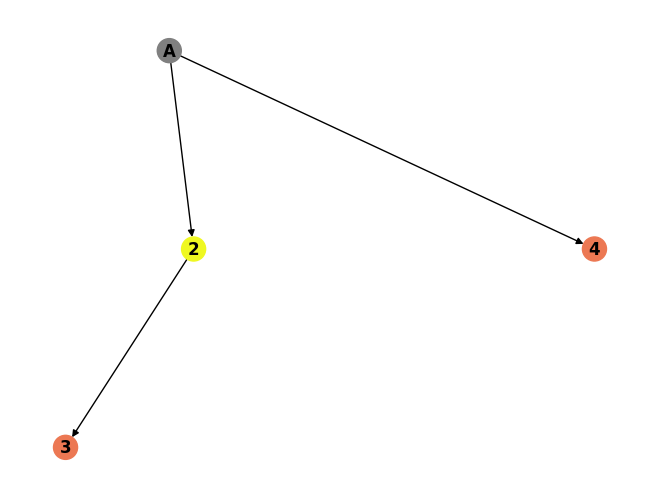

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.seterr(all="print")
import tensorcraft as tc

from tensorcraft.viz.program_graph import draw_program_graph, draw_expression_graph

join_and_split_axis_program = tc.compile("""
B[(ijk)] = A[i,j,k]
C[i,j] = B[(ij)]                                       
Row[j] = A[0,j,k]
""")

A = np.random.randn(3, 4, 5)
expected_B = A.reshape(60)
expected_C = expected_B.reshape(6, 10)
outputs = join_and_split_axis_program.execute(inputs={
    "A": A
}, shape_hints={
    "B": (60,),
    "C": (6,10),
    "Row": (4,)
})

print("B :", outputs["B"])
print("C :", outputs["C"])
print("Row :", outputs["Row"])

print("B ~= expected_B: ", np.allclose(outputs["B"], expected_B))
print("C ~= expected_C: ", np.allclose(outputs["C"], expected_C))

tc.viz.draw_program_graph(join_and_split_axis_program)

## Expressions with mutiple tensor orders

Positioning nodes


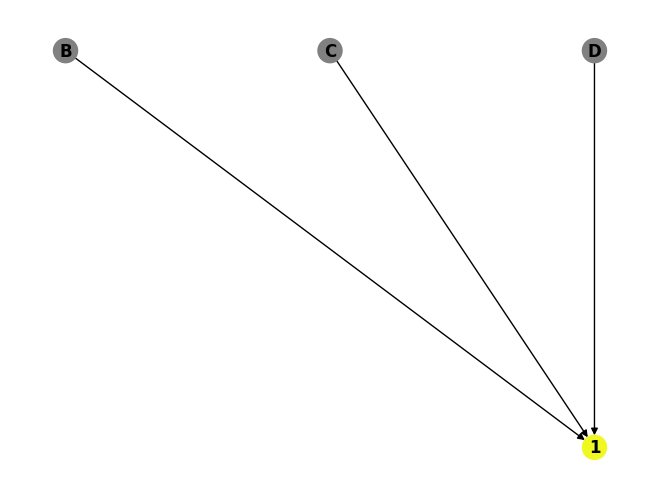

In [2]:
small_program = tc.compile("A[i,j] = B[i,j] + B[j,i] + C[i] + D + i")
tc.viz.draw_program_graph(small_program)

Positioning nodes


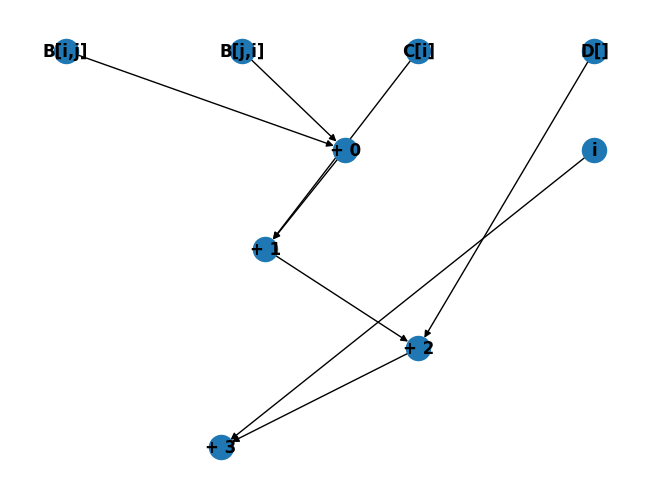

In [3]:
tc.viz.draw_expression_graph(small_program.tensor_expressions[1])

In [4]:

B = np.ones((10,10))
C = np.ones(10) + 10
expected = B + B.T + C + 100 + np.arange(10).reshape(-1,1)
result = small_program.execute({'B': B, 'C': C, 'D': 100}, shape_hints={'A': (10,10)})
print(expected)
print(result["A"])
np.all(result["A"] == expected)

[[113. 113. 113. 113. 113. 113. 113. 113. 113. 113.]
 [114. 114. 114. 114. 114. 114. 114. 114. 114. 114.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [116. 116. 116. 116. 116. 116. 116. 116. 116. 116.]
 [117. 117. 117. 117. 117. 117. 117. 117. 117. 117.]
 [118. 118. 118. 118. 118. 118. 118. 118. 118. 118.]
 [119. 119. 119. 119. 119. 119. 119. 119. 119. 119.]
 [120. 120. 120. 120. 120. 120. 120. 120. 120. 120.]
 [121. 121. 121. 121. 121. 121. 121. 121. 121. 121.]
 [122. 122. 122. 122. 122. 122. 122. 122. 122. 122.]]
[[113. 113. 113. 113. 113. 113. 113. 113. 113. 113.]
 [114. 114. 114. 114. 114. 114. 114. 114. 114. 114.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [116. 116. 116. 116. 116. 116. 116. 116. 116. 116.]
 [117. 117. 117. 117. 117. 117. 117. 117. 117. 117.]
 [118. 118. 118. 118. 118. 118. 118. 118. 118. 118.]
 [119. 119. 119. 119. 119. 119. 119. 119. 119. 119.]
 [120. 120. 120. 120. 120. 120. 120. 120. 120. 120.]
 [121. 121. 121. 121. 121. 121. 121. 121. 121

np.True_

## Min reduction

In [5]:
min_red_program = tc.compile("""
Min[j] = 10000
Min[j] += (X[i,j] < Min[j]) * (X[i,j] - Min[j])
""")

X = np.random.randn(200,10)
expected = X.min(axis=0)
print(expected)

result = min_red_program.execute({'X': X}, shape_hints={'Min': (10,)})
print(result["Min"])
print(np.all(result["Min"] == expected))



[-2.49233298 -2.78642176 -2.7252673  -2.41782424 -3.33459258 -2.73056956
 -2.43784236 -2.86366581 -3.14582087 -2.64763628]
[-2.49233298 -2.78642176 -2.7252673  -2.41782424 -3.33459258 -2.73056956
 -2.43784236 -2.86366581 -3.14582087 -2.64763628]
True


## KMeans Kernel

Reducing the classic way
Reducing the classic way
Reducing the classic way
Min:  [ 3.57568547 10.27272345  1.43911027  1.0725282   2.638694    0.
 10.21003514  1.01081981  2.807593    4.51758966  2.10731698  9.99869032
  0.          1.98877371  0.          6.34369739  4.24975938  2.07213973
  0.          0.        ]
expected_min:  [ 3.57568547 10.27272345  1.43911027  1.0725282   2.638694    0.
 10.21003514  1.01081981  2.807593    4.51758966  2.10731698  9.99869032
  0.          1.98877371  0.          6.34369739  4.24975938  2.07213973
  0.          0.        ]
expected_Labels:  [1 2 2 1 4 4 0 2 1 4 4 2 3 0 2 1 0 3 0 1]
[ True  True False  True  True  True False False  True  True  True  True
  True False  True  True False  True  True  True]
Labels:  [1. 2. 2. 1. 4. 4. 0. 2. 1. 4. 4. 2. 3. 0. 2. 1. 0. 3. 0. 1.]
Dist ~= expected_Dist:  True
Min ~= expected_Min:  True
Labels ~= expected_Labels:  True
Count ~= expected_Count:  True
Update ~= expected_Update:  True
expected_Update: [[ 0.0

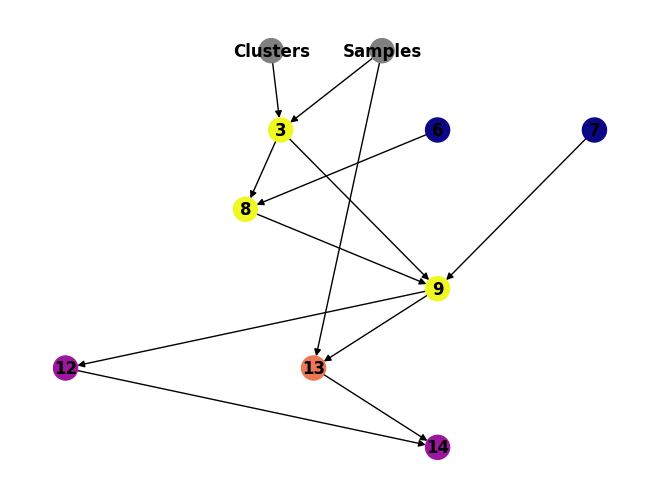

In [6]:
from scipy.spatial.distance import cdist
TOL = 1e-7

code = """
# Distance computation
Dist[j,k] += (Samples[j,l] - Clusters[k,l]) * (Samples[j,l] - Clusters[k,l])

# Argmin
Min[j] = 1000
Labels[j] = -1
Min[j] += ( Dist[j,k] < Min[j] ) * ( Dist[j,k] - Min[j] )
Labels[j] += (Dist[j,k] == Min[j]) * (k - Labels[j])

# # Cluster update
Count[l] += (Labels[j] == l)
Update[l,k] += Samples[j,k] * (Labels[j] == l)
Update[l,k] = Update[l,k] / Count[l]
"""
kmeans_kernel = tc.compile(code)

n_samples = 20
sample_dim = 5
n_cluster = 5

Samples = np.random.randn(n_samples, sample_dim)
Clusters = Samples[np.random.randint(n_samples, size=n_cluster)]

# Compute expected labels
expected_Dist = cdist(Samples, Clusters, 'sqeuclidean')
expected_Min = np.min(expected_Dist, axis=1)
expected_Labels = expected_Dist.argmin(axis=1)

# Update cluster centers
expected_Count = np.zeros(n_cluster)
expected_Update = np.zeros((n_cluster, sample_dim))

for j in range(n_samples):
    l = expected_Labels[j]
    expected_Count[l] += 1
    expected_Update[l] += Samples[j]

expected_Update /= expected_Count.reshape(-1, 1)


outputs = kmeans_kernel.execute(inputs={
    'Samples': Samples,
    'Clusters': Clusters
}, shape_hints={
    'Dist': (n_samples, n_cluster),
    'Min': (n_samples,),
    'Labels': (n_samples,),
    'Count': (n_cluster,),
    'Update': (n_cluster, sample_dim)
})

print("Min: ", outputs['Min'])
print("expected_min: ", expected_Min)
print("expected_Labels: ", expected_Labels)
print(expected_Min == outputs['Min'])
print("Labels: ", outputs['Labels'])
print("Dist ~= expected_Dist: ", np.all(outputs['Dist'] == expected_Dist))
print("Min ~= expected_Min: ", np.allclose(outputs['Min'], expected_Min))
print("Labels ~= expected_Labels: ", np.all(outputs['Labels'] == expected_Labels))
print("Count ~= expected_Count: ", np.all(outputs['Count'] == expected_Count))
print("Update ~= expected_Update: ", np.allclose(outputs['Update'], expected_Update))
print(f"expected_Update: {expected_Update}")
print(f"Update: {outputs['Update']}")

draw_program_graph(kmeans_kernel, color_by="opcount")

Positioning nodes


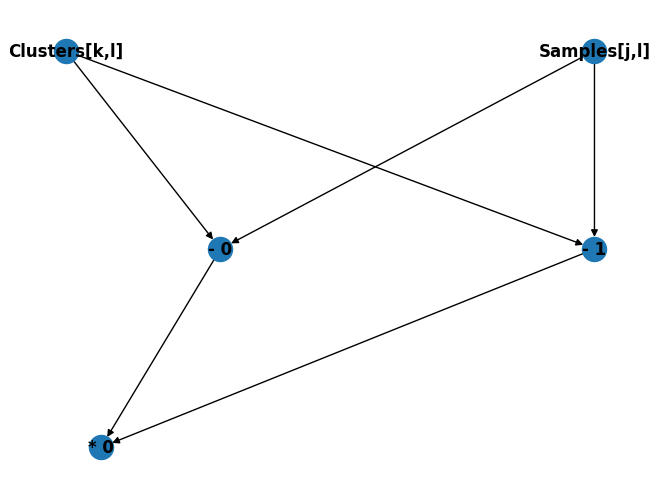

In [7]:
draw_expression_graph(kmeans_kernel.tensor_expressions[3])

Positioning nodes


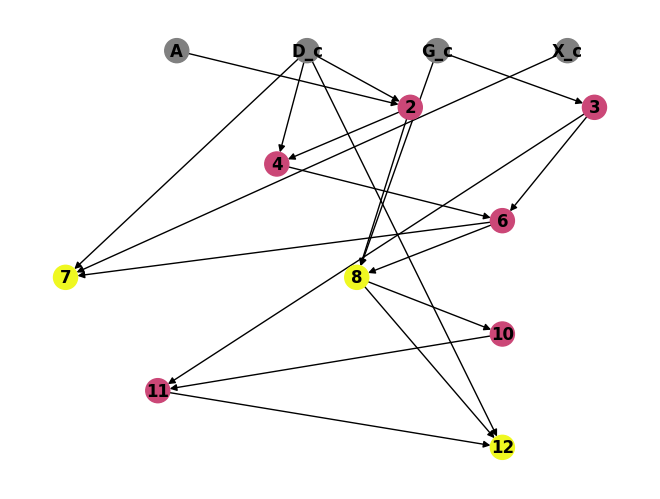

In [8]:
code = """
W_c[i] += A[i,j] * D_c[j]
Gamma_c += G_c[i] * G_c[i]
Theta_c += D_c[i] * W_c[i]

Alpha_c = Gamma_c / Theta_c
X_n[i] = X_c[i] + (Alpha_c * D_c[i])
G_n[i] = G_c[i] + (Alpha_c * W_c[i])

Gamma_n += G_n[i] * G_n[i]
Beta_n = Gamma_n / Gamma_c
Delta_n += (Beta_n * D_c[i]) - G_n[i]
"""
conjugate_gradient_kernel = tc.compile(code)

draw_program_graph(conjugate_gradient_kernel, color_by='opcount')


Positioning nodes


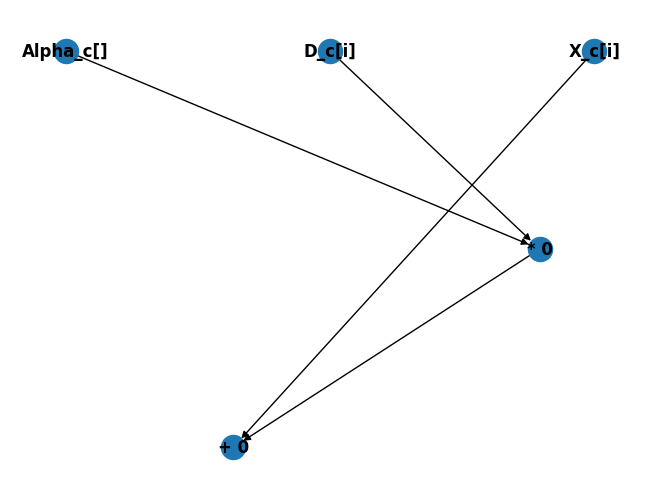

In [9]:
draw_expression_graph(conjugate_gradient_kernel.tensor_expressions[7])

In [10]:
a = eval("1 + 2")

In [11]:
import networkx as nx
graph = nx.Graph()
graph.add_node(1, neg=True)
graph.add_node(2, neg=False)
for node in graph:
    print(nx.get_node_attributes(graph, 'neg')[node])

True
False


In [12]:
np.finfo(np.float64).eps

np.float64(2.220446049250313e-16)